## **😀경제지표에 따른 서울시 교통량 예측하기😀**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

In [2]:
data=pd.read_csv("../data/complete.csv",encoding="utf-8")
data.head()

,date,GDP,Economic growth rate,Regular Gasoline,Diesel for automobiles,population,Car registration,Min wage,Min wage increase rate,City bus trunk line,...,Texi,Model texi,Consumer price,Interest rate,Number of employed,Export amount,Export growth rate,Import amount,Import growth rate,Traffic rate
0,2015-01-01,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5400081.5
1,2015-01-02,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5220255.0
2,2015-01-03,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,4480084.5
3,2015-01-04,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5486275.0
4,2015-01-05,394273.0,2.4,1531.05,1351.25,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5831397.0


In [3]:
# 필요한 컬럼 선택
features = data[['Car registration', 'Import growth rate', 'Export growth rate', 'Traffic rate']]

In [4]:
# 결측치 중앙값으로 대체
features.fillna(features.median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9652\3991637398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.median(), inplace=True)


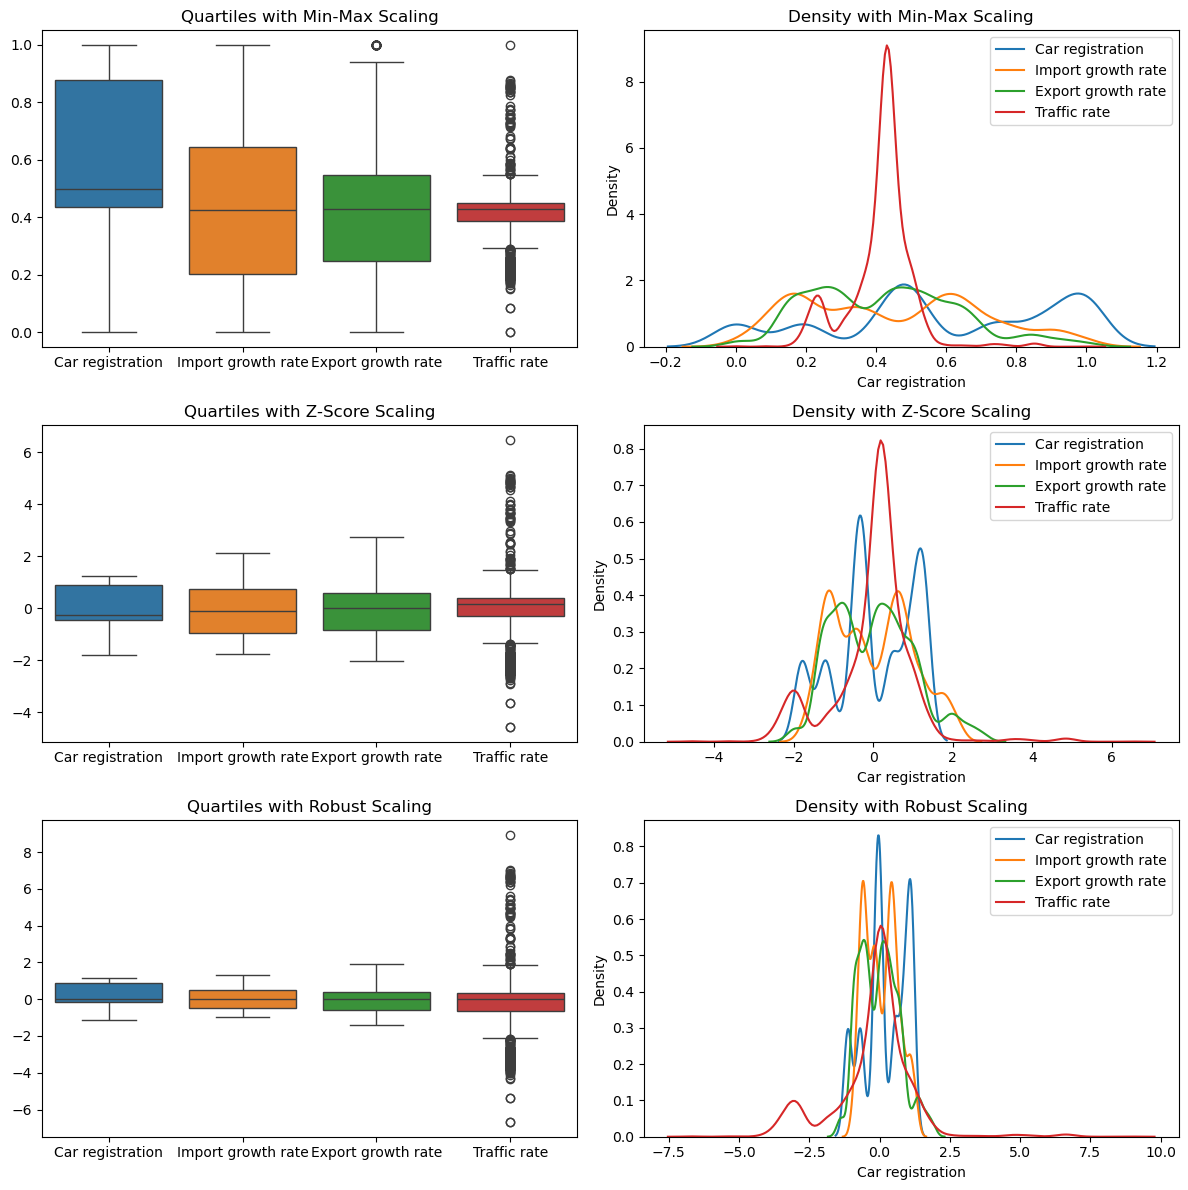

In [5]:
# 스케일러 초기화
scalers = {
    'Min-Max Scaling': MinMaxScaler(),
    'Z-Score Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler(),
    'Vector Normalization': Normalizer(norm='l2')
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled_data[name] = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 시각화
fig, axes = plt.subplots(nrows=len(scalers)-1, ncols=2, figsize=(12, 12))  # Normalizer는 3D로 따로 그립니다.
for i, (name, data_scaled) in enumerate(scaled_data.items()):
    if name != 'Vector Normalization':
        # Boxplot for quartiles
        sns.boxplot(data=data_scaled, ax=axes[i, 0])
        axes[i, 0].set_title(f'Quartiles with {name}')
        
        # KDE plot for density
        for column in features.columns:
            sns.kdeplot(data_scaled[column], ax=axes[i, 1], label=column)
        axes[i, 1].set_title(f'Density with {name}')
        axes[i, 1].legend()

plt.tight_layout()

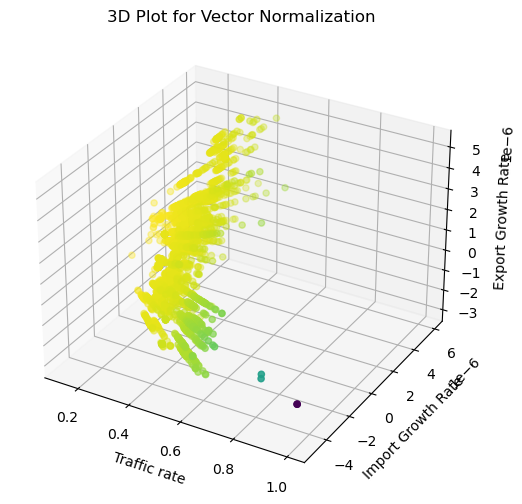

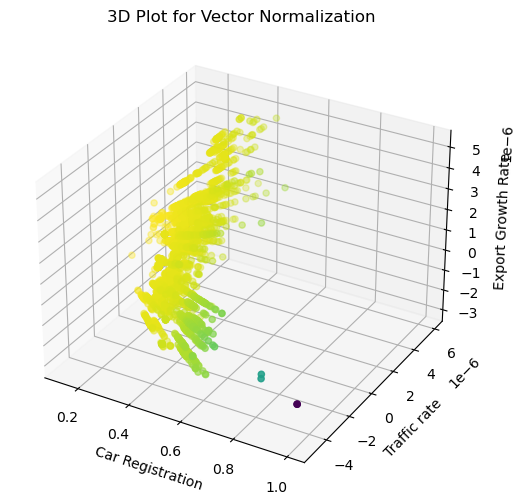

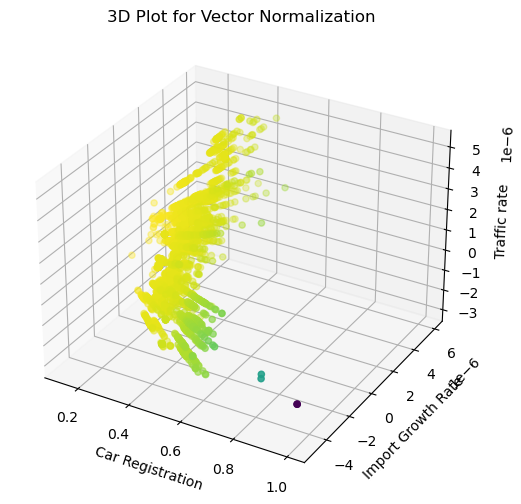

In [6]:
# 3D plot for Vector Normalization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
normalized_data = scaled_data['Vector Normalization']
ax.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=normalized_data.iloc[:, 3], cmap='viridis')
ax.set_xlabel('Traffic rate')
ax.set_ylabel('Import Growth Rate')
ax.set_zlabel('Export Growth Rate')
ax.set_title('3D Plot for Vector Normalization')
plt.show()

# 3D plot for Vector Normalization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
normalized_data = scaled_data['Vector Normalization']
ax.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=normalized_data.iloc[:, 3], cmap='viridis')
ax.set_xlabel('Car Registration')
ax.set_ylabel('Traffic rate')
ax.set_zlabel('Export Growth Rate')
ax.set_title('3D Plot for Vector Normalization')
plt.show()

# 3D plot for Vector Normalization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
normalized_data = scaled_data['Vector Normalization']
ax.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=normalized_data.iloc[:, 3], cmap='viridis')
ax.set_xlabel('Car Registration')
ax.set_ylabel('Import Growth Rate')
ax.set_zlabel('Traffic rate')
ax.set_title('3D Plot for Vector Normalization')
plt.show()